In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

from sklearn.impute import SimpleImputer


import os
print(os.listdir("data"))

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']


In [5]:
#import data
df = pd.read_csv("data/train.csv", sep=',', header=0)
test = pd.read_csv("data/test.csv",sep=',', header=0)

#ID isn't useful
df.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

example_submision = pd.read_csv("data/sample_submission.csv",sep=',', header=0)
example_submision.head()


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [6]:
df.shape

(1460, 80)

In [7]:
test.shape

(1459, 79)

In [8]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

<AxesSubplot:>

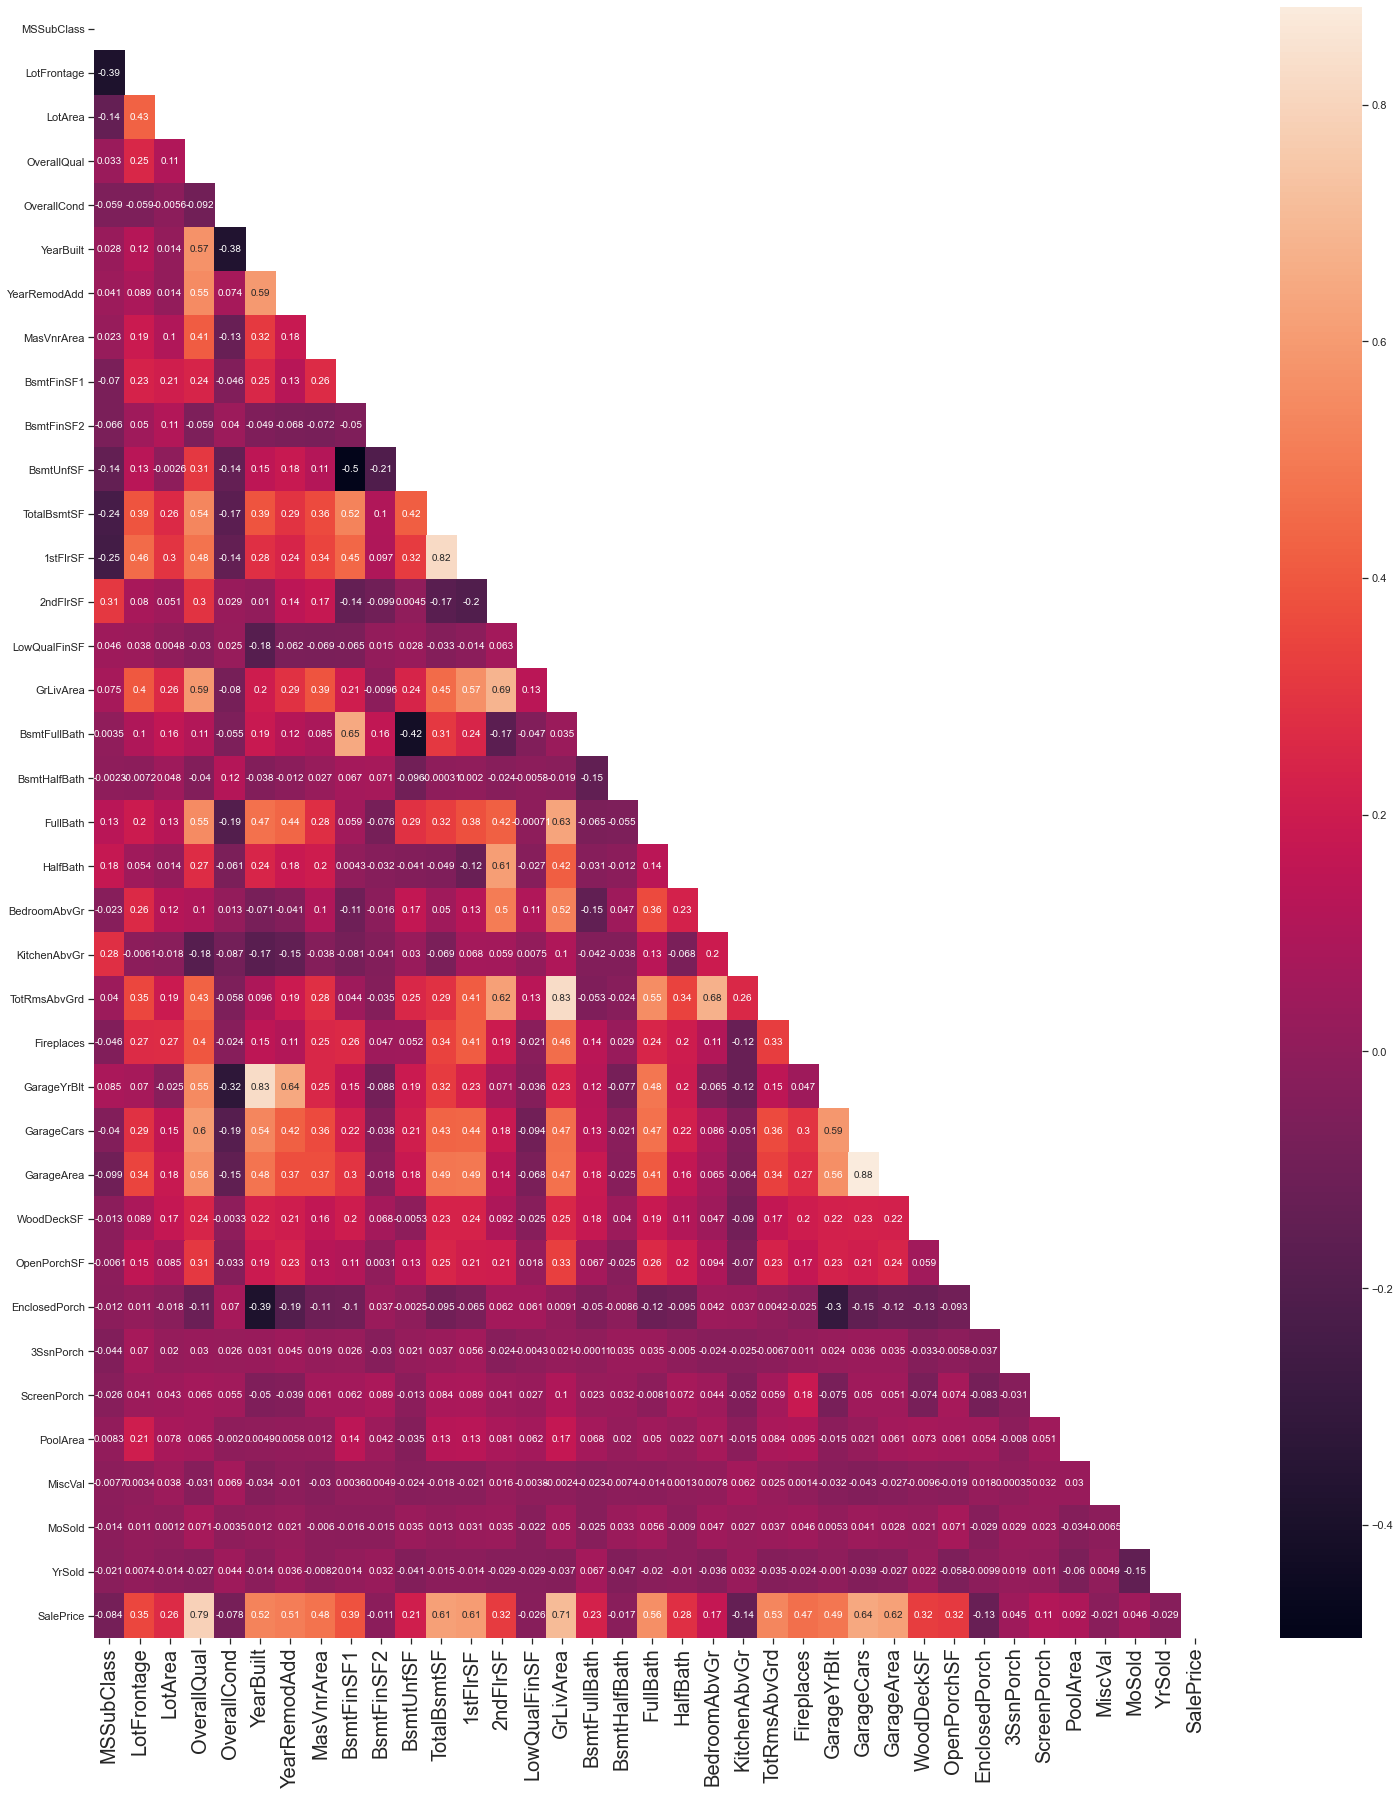

In [12]:
plt.figure(figsize=(25,30))
plt.xticks(fontsize=20)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, annot=True)

In [13]:
'''
Look to find what is correlated with Saleprice and then trying to find if there are correlations between other variables 

OverallQual - GarageYrBlt, Garage Cars / Garage Area, Fullbath, GrLivArea, 1stFlrSF, TotalBsmtSF, YearBuilt, YearRemodAdd
Yearbuilt - GarageYrBlt, GarageCars, GarageArea (Makes Sense, the newer it is, the more likely it is to have larger things)
YearRemodAdd - GarageYrBlt
MasVnrArea - Nothing above.5 but Garage,bathroom stuff
BsmtFinSF1 - 1stFloorSF, TotalBSMTSF - Bigger the top floor, the bigger the 
TotalBsmtSF,- GarageArea, GarageCars
GrLivArea - TotRmsAbvGrd(high)
FullBath,
TotRmsAbvGrd,
Fireplaces, 
GarageYrBlt
GarageCars
GarageArea

'''
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

corr = pd.DataFrame(columns=['var1', 'var2', 'Correlation'])
for index, value in sol.items():
    corr = corr.append({'var1':index[0],'var2':index[1],'Correlation':value}, ignore_index=True)

print(corr[corr.Correlation>.5])    

            var1          var2  Correlation
0     GarageCars    GarageArea     0.882475
1      YearBuilt   GarageYrBlt     0.825667
2      GrLivArea  TotRmsAbvGrd     0.825489
3    TotalBsmtSF      1stFlrSF     0.819530
4    OverallQual     SalePrice     0.790982
5      GrLivArea     SalePrice     0.708624
6       2ndFlrSF     GrLivArea     0.687501
7   BedroomAbvGr  TotRmsAbvGrd     0.676620
8     BsmtFinSF1  BsmtFullBath     0.649212
9   YearRemodAdd   GarageYrBlt     0.642277
10    GarageCars     SalePrice     0.640409
11     GrLivArea      FullBath     0.630012
12    GarageArea     SalePrice     0.623431
13      2ndFlrSF  TotRmsAbvGrd     0.616423
14   TotalBsmtSF     SalePrice     0.613581
15      2ndFlrSF      HalfBath     0.609707
16      1stFlrSF     SalePrice     0.605852
17   OverallQual    GarageCars     0.600671
18   OverallQual     GrLivArea     0.593007
19     YearBuilt  YearRemodAdd     0.592855
20   GarageYrBlt    GarageCars     0.588920
21   OverallQual     YearBuilt  

In [14]:


def missing_percentage(df):
    
    '''A function for showing missing data values'''
    
    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
               100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                     100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_percentage(df)



,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageCond,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [15]:
df_pool_owners = df[df['PoolArea']>0]
print(len(df_pool_owners))
missing_percentage(df_pool_owners)
#So there are only 7 houses with a pool

7


,Total,Percent
Alley,7,100.000000
MiscFeature,6,85.714286
LotFrontage,1,14.285714
Fence,1,14.285714


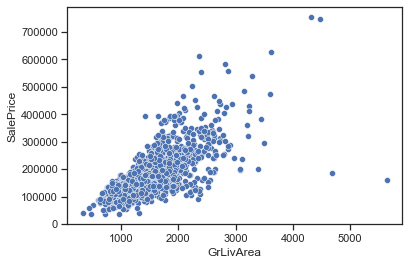

In [16]:
#Outlier Removal
#There may be some outliers in different features, but that is too be expected just because of the differences in houses
#One case that could be an issue is a Large house sold for a low price (Perhaps to a family member), these would negatively
#Effect the model
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")
df = df.drop(df[(df['GrLivArea']>4500) & (df['SalePrice']<250000)].index)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

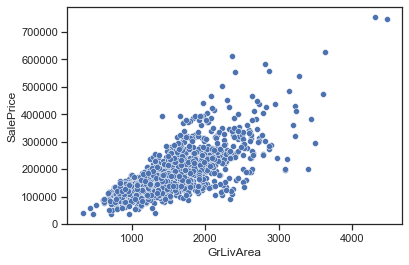

In [17]:
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")


In [18]:
#Feature Engineering

#Make sure we keep how long the train and test sets are
ntrain = df.shape[0]
ntest = test.shape[0]

y_train = df.SalePrice.values
X_train = df.drop(['SalePrice'], axis=1)
total_data = pd.concat((df, test)).reset_index(drop=True)
total_data.drop(['SalePrice'], axis=1, inplace=True)


In [19]:
print(len(total_data))
missing_percentage(total_data)

2917


,Total,Percent
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageCond,159,5.450806
GarageQual,159,5.450806
GarageYrBlt,159,5.450806
GarageFinish,159,5.450806


In [20]:
#Using the details sheet

#Metrics that have nothing in the entree

#If it doesn't have a pool, fill it with empty data
total_data["PoolQC"] = total_data["PoolQC"].fillna("None")

#MiscFeature are just features not included in the rest of the data
total_data["MiscFeature"] = total_data["MiscFeature"].fillna("None")

#Alley shows where or not there is an alley
total_data["Alley"] = total_data["Alley"].fillna("None")

#Fence Quality of fence, NA if no fence
total_data["Fence"] = total_data["Fence"].fillna("None")

#FirePlaceQu Quality of fire place, NA if none
total_data["FireplaceQu"] = total_data["FireplaceQu"].fillna("None")

In [21]:
#Metrics that need to be filled with an estimated metric

#LotFrontage is the linear feet of Street connected to property.  Since these are houses they have to be connected 
#to a street.  Using an overall metric won't make sense, but we can assume houses in a neighborhood are similiar
#in addition we should probably use the median because a large or small house will mess up the mean

total_data['LotFrontage'] = total_data.groupby(['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))


In [22]:
#These Garage features are all the same, if NA, then there is no garage

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    total_data[col] = total_data[col].fillna('None')
    
#If there isn't a garage (so NA) these metrics should be set to 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    total_data[col] = total_data[col].fillna(0)    

In [23]:
#Basement

for col in ('BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1'):
    total_data[col] = total_data[col].fillna('None')
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    total_data[col] = total_data[col].fillna(0)



In [24]:
#Masonry info.  Type is categorical, area is a metric
total_data["MasVnrType"] = total_data["MasVnrType"].fillna("None")
total_data["MasVnrArea"] = total_data["MasVnrArea"].fillna(0)



In [25]:
#MSZoning isn't missing much, we can probably fill with the most common
total_data['MSZoning'].value_counts()
total_data['MSZoning'] = total_data['MSZoning'].fillna(total_data['MSZoning'].mode()[0])

total_data['Exterior2nd'] = total_data['Exterior2nd'].fillna(total_data['Exterior2nd'].mode()[0])

total_data['Exterior1st'] = total_data['Exterior1st'].fillna(total_data['Exterior1st'].mode()[0])

total_data['SaleType'] = total_data['SaleType'].fillna(total_data['SaleType'].mode()[0])


In [26]:
#Only one house without sewage, doesn't really help us
total_data['Utilities'].value_counts()
total_data = total_data.drop(['Utilities'], axis=1)


In [27]:
total_data["Functional"] = total_data["Functional"].fillna(total_data['Functional'].mode()[0])
total_data['Electrical'].value_counts()
total_data["Electrical"] = total_data["Electrical"].fillna(total_data['Electrical'].mode()[0])
total_data["KitchenQual"] = total_data["KitchenQual"].fillna(total_data['KitchenQual'].mode()[0])

In [28]:
#All data filled
missing_percentage(total_data)


,Total,Percent


In [29]:
#Add custom columns
total_data['TotalSF'] = total_data['TotalBsmtSF'] + total_data['1stFlrSF'] + total_data['2ndFlrSF']

#Add together all available bathrooms.  .5 means no shower
total_data['TotalBathrooms'] = (total_data['FullBath'] + (0.5 * total_data['HalfBath']) 
                                + total_data['BsmtFullBath'] + (0.5 * total_data['BsmtHalfBath']))

#Add all available qualities
total_data['TotalExtQual'] = (total_data['ExterQual'] + total_data['ExterCond'])
total_data['TotalBsmQual'] = (total_data['BsmtQual'] + total_data['BsmtCond'] + total_data['BsmtFinType1'] + total_data['BsmtFinType2'])
total_data['TotalGrgQual'] = (total_data['GarageQual'] + total_data['GarageCond'])
#not including total_data['OverallQual'] because it is already a function of them
total_data['TotalQual'] = (total_data['TotalExtQual'] + total_data['TotalBsmQual'] + total_data['TotalGrgQual'] + total_data['KitchenQual'] + total_data['HeatingQC'])


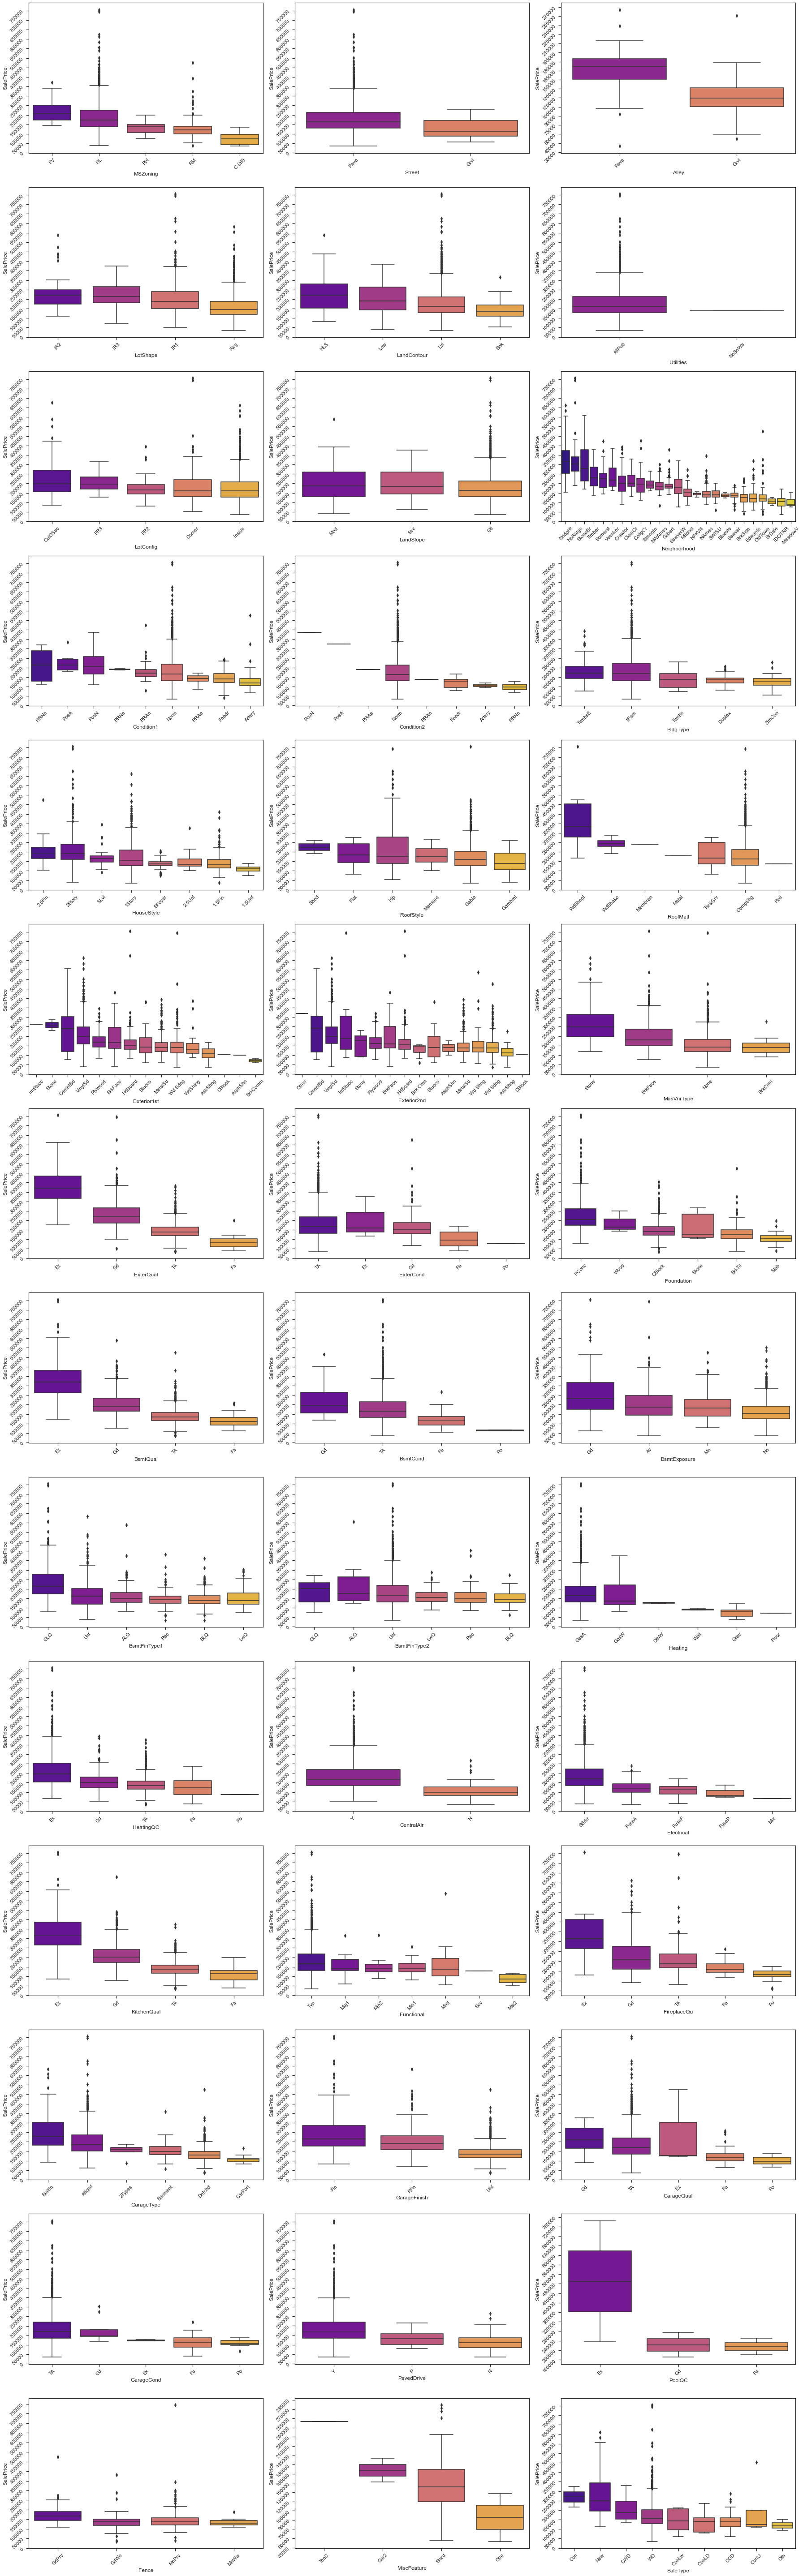

In [30]:
from matplotlib.ticker import MaxNLocator
def srt_box(y, df):
    fig, axes = plt.subplots(14, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['object']).columns, axes):

        sortd = df.groupby([i])[y].median().sort_values(ascending=False)
        sns.boxplot(x=i,
                    y=y,
                    data=df,
                    palette='plasma',
                    order=sortd.index,
                    ax=j)
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=18))

        plt.tight_layout()
srt_box('SalePrice',df)

In [31]:
total_data.select_dtypes(exclude=['int', 'float']).columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleConditio

In [32]:
total_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalBathrooms,TotalExtQual,TotalBsmQual,TotalGrgQual,TotalQual
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,2,2008,WD,Normal,2566.0,3.5,GdTA,GdTAGLQUnf,TATA,GdTAGdTAGLQUnfTATAGdEx
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,5,2007,WD,Normal,2524.0,2.5,TATA,GdTAALQUnf,TATA,TATAGdTAALQUnfTATATAEx
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,9,2008,WD,Normal,2706.0,3.5,GdTA,GdTAGLQUnf,TATA,GdTAGdTAGLQUnfTATAGdEx
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,2,2006,WD,Abnorml,2473.0,2.0,TATA,TAGdALQUnf,TATA,TATATAGdALQUnfTATAGdGd
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,12,2008,WD,Normal,3343.0,3.5,GdTA,GdTAGLQUnf,TATA,GdTAGdTAGLQUnfTATAGdEx


In [33]:
total_data.dtypes

MSSubClass          int64
MSZoning           object
LotFrontage       float64
LotArea             int64
Street             object
                   ...   
TotalBathrooms    float64
TotalExtQual       object
TotalBsmQual       object
TotalGrgQual       object
TotalQual          object
Length: 84, dtype: object

In [34]:
#Rare Values
rare_values = [
    'Condition1', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd','Heating', 'Electrical', 'Functional', 'SaleType'
]

for col in rare_values:
    mask = total_data[col].isin(total_data[col].value_counts()[total_data[col].value_counts() < 10].index)
    total_data[col][mask] = 'Rare_value'    
    

In [109]:
#MSSubClass=number indicating the type of dwelling
total_data['MSSubClass'] = total_data['MSSubClass'].astype('category')
total_data['OverallCond'] = total_data['OverallCond'].astype('category')
total_data['MSZoning'] = total_data['MSZoning'].astype('category')
total_data['LotShape'] = total_data['LotShape'].astype('category')
#'MSZoning',
#total_data['YrSold'] = total_data['YrSold'].astype('object')
#total_data['MoSold'] = total_data['MoSold'].astype('object')



Categorical Data
MSZoning
LandContour
Neighborhood
Conditions
MasVnrType
Quality Features
CentralAir
GarageType
Misc

In [99]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = total_data.select_dtypes(exclude=numerics)
print(newdf.columns)
#print(newdf.head())

#newdfcols = newdf.columns.to_list()

cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']


cols_to_encode = ['Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
                 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                 'KitchenQual','Functional','FireplaceQu','GarageType',
                 'GarageFinish','GarageQual', 'GarageCond','PavedDrive', 
                 'PoolQC', 'Fence','MiscFeature', 'SaleType','SaleCondition',
                 
                 'TotalExtQual','TotalBsmQual','TotalGrgQual','TotalQual','LotFrontage','MasVnrArea','BsmtFinSF1',
                 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageYrBlt','GarageCars','GarageArea',
                 'BsmtFullBath','BsmtHalfBath','TotalSF','TotalBathrooms','MoSold','YrSold']

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(total_data.head())
   


Index(['MSSubClass', 'MSZoning', 'LotShape', 'OverallCond', 'MoSold',
       'YrSold'],
      dtype='object')
  MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley LotShape  \
0         60        3           42     8450       1      1        3   
1         20        3           58     9600       1      1        3   
2         60        3           45    11250       1      1        0   
3         70        3           36     9550       1      1        0   
4         60        3           63    14260       1      1        0   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0            3          4          0             5           2           1   
1            3          2          0            24           1           1   
2            3          4          0             5           2           1   
3            3          0          0             6           2           1   
4            3          2          0            15           2           

In [100]:
from sklearn import preprocessing
total_data_encoded = total_data
for col in cols_to_encode:

    le = preprocessing.LabelEncoder()
    le.fit(list(total_data[col].values))
    total_data_encoded[col] = le.transform(list(total_data[col].values))

In [101]:
newdf = total_data.select_dtypes(exclude=numerics)
print(newdf.columns)

Index(['MSSubClass', 'MSZoning', 'OverallCond'], dtype='object')


C:\Users\Mandirin\Anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
C:\Users\Mandirin\Anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
C:\Users\Mandirin\Anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
C:\Users\Mandirin\Anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
C:\Users\Mandirin\Anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
C:\Users\Mandirin\Anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


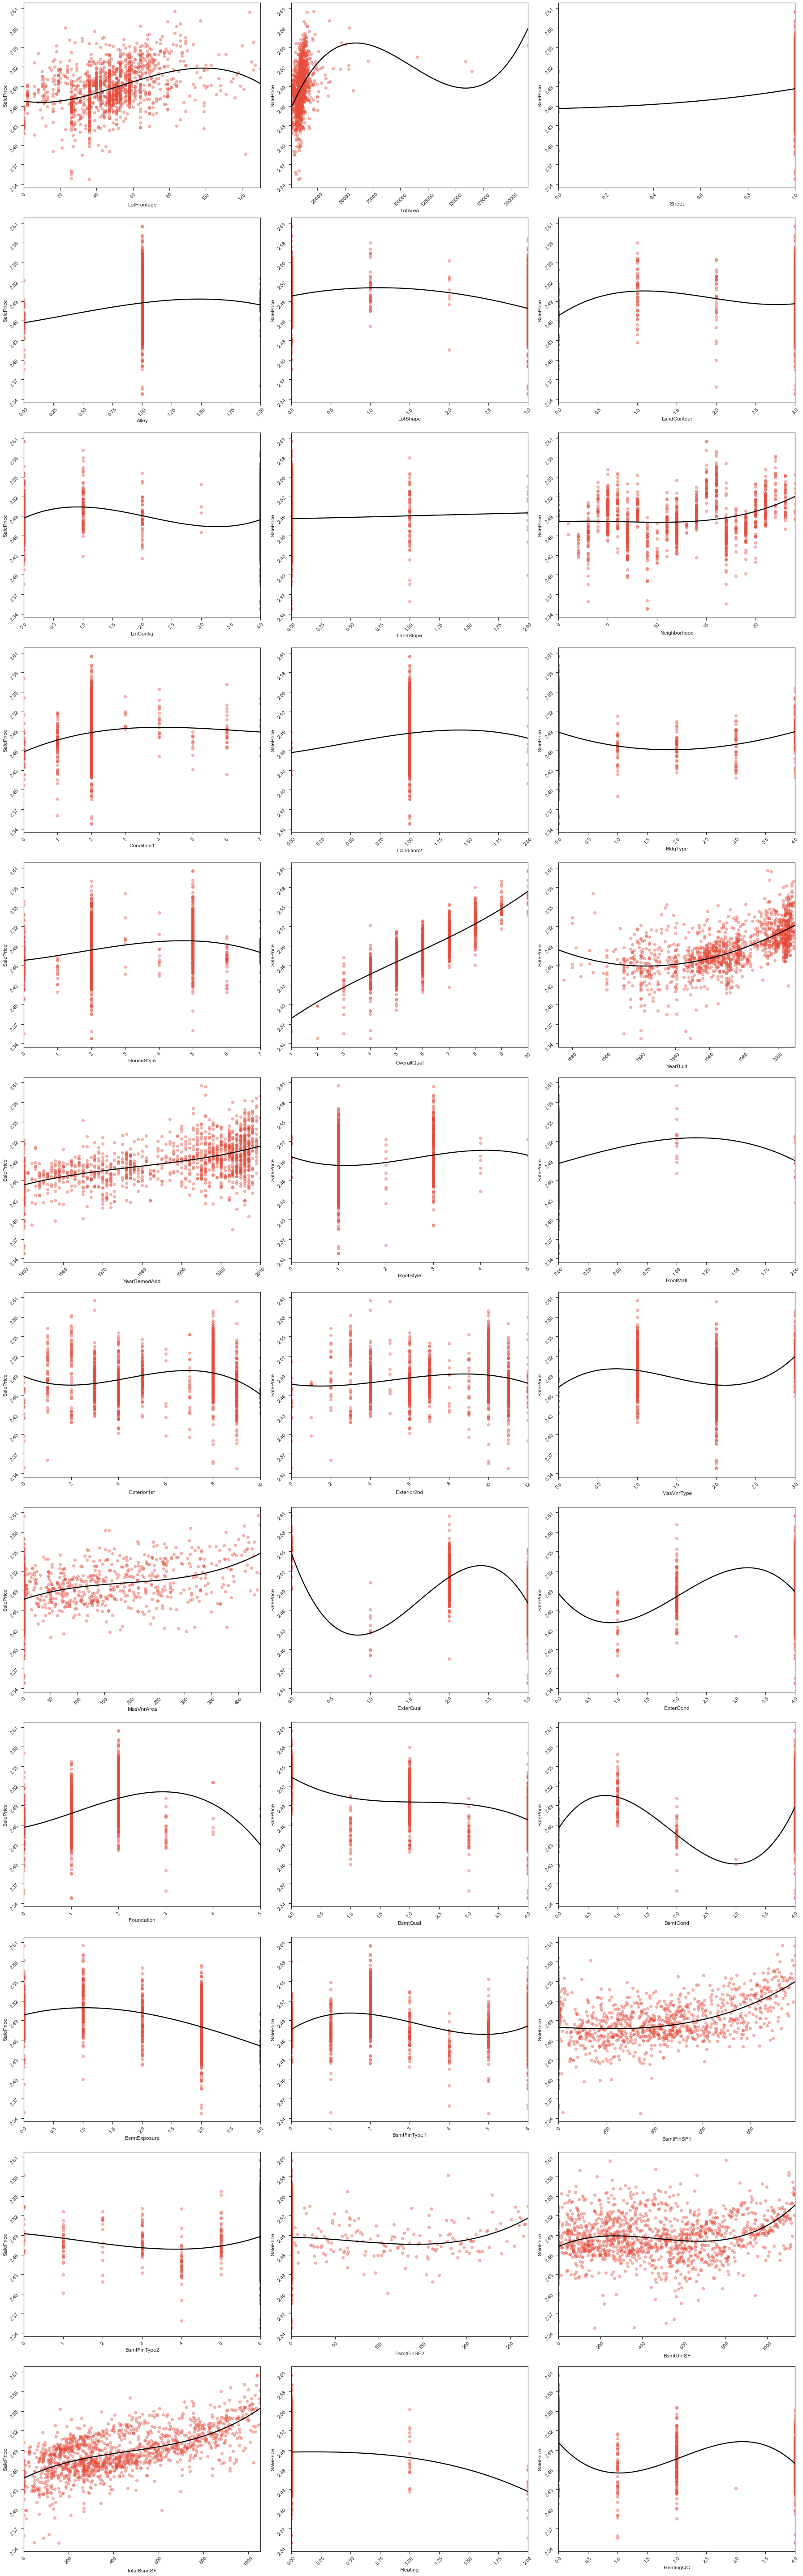

In [102]:
def srt_reg(y, df):
    fig, axes = plt.subplots(12, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):

        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()
        
temp_train = total_data[0:ntrain]
temp_train['SalePrice'] = y_train
srt_reg('SalePrice', temp_train)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

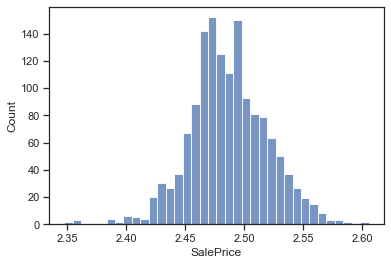

In [103]:
#Sales are pretty skewed, so it may be good to do a log transformation
sns.histplot((temp_train.SalePrice))

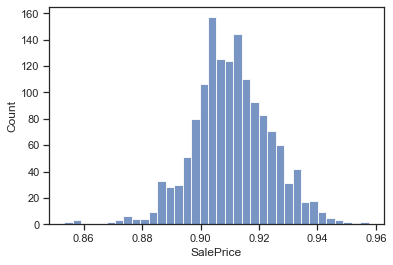

In [104]:
sns.histplot(np.log(temp_train.SalePrice))
y_train = np.log(y_train)

In [105]:
print(total_data['MSSubClass'].head())

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: object


In [110]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MSSubClass      2917 non-null   category
 1   MSZoning        2917 non-null   category
 2   LotFrontage     2917 non-null   int64   
 3   LotArea         2917 non-null   int64   
 4   Street          2917 non-null   int64   
 5   Alley           2917 non-null   int64   
 6   LotShape        2917 non-null   category
 7   LandContour     2917 non-null   int64   
 8   LotConfig       2917 non-null   int64   
 9   LandSlope       2917 non-null   int64   
 10  Neighborhood    2917 non-null   int64   
 11  Condition1      2917 non-null   int64   
 12  Condition2      2917 non-null   int64   
 13  BldgType        2917 non-null   int64   
 14  HouseStyle      2917 non-null   int64   
 15  OverallQual     2917 non-null   int64   
 16  OverallCond     2917 non-null   category
 17  YearBuilt     

Model Building

In [124]:
#We're going to try a Random Forest first using all of the data because RF are pretty good at picking out what is important 
#And usually function better with more variables
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

#Turn all of our categorical data into a column for each option and 1 or 0 inside indicating if that 


total_data_one_hot =  pd.get_dummies(total_data)
train_one_hot = total_data_one_hot[0:ntrain]
test_one_hot = total_data_one_hot[ntrain:0]

clf = RandomForestClassifier()

print(total_data_one_hot.head())

   LotFrontage  LotArea  Street  Alley  LandContour  LotConfig  LandSlope  \
0           42     8450       1      1            3          4          0   
1           58     9600       1      1            3          2          0   
2           45    11250       1      1            3          4          0   
3           36     9550       1      1            3          0          0   
4           63    14260       1      1            3          2          0   

   Neighborhood  Condition1  Condition2  ...  LotShape_3  OverallCond_0  \
0             5           2           1  ...           1              0   
1            24           1           1  ...           1              0   
2             5           2           1  ...           0              0   
3             6           2           1  ...           0              0   
4            15           2           1  ...           0              0   

   OverallCond_1  OverallCond_2  OverallCond_3  OverallCond_4  OverallCond_5  \
0     

In [125]:
train_one_hot.head()

,LotFrontage,LotArea,Street,Alley,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,LotShape_3,OverallCond_0,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8
0,42,8450,1,1,3,4,0,5,2,1,...,1,0,0,0,0,1,0,0,0,0
1,58,9600,1,1,3,2,0,24,1,1,...,1,0,0,0,0,0,0,0,1,0
2,45,11250,1,1,3,4,0,5,2,1,...,0,0,0,0,0,1,0,0,0,0
3,36,9550,1,1,3,0,0,6,2,1,...,0,0,0,0,0,1,0,0,0,0
4,63,14260,1,1,3,2,0,15,2,1,...,0,0,0,0,0,1,0,0,0,0


In [126]:
# Perform Grid-Search
def rfr_model(X, y):
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_

    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)

# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores

rfr_model(train_one_hot, y_train)

array([-0.00349796, -0.00338388, -0.0036126 , -0.00338709, -0.00391521,
       -0.00313348, -0.00333678, -0.00336923, -0.00308437, -0.00378939])

In [46]:
print(scores)

NameError: name 'scores' is not defined